# IUV Dataset on Apoapse and Periapse Observations

### By Sarthak Katyal

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
import warnings
from astropy.io import fits
from astropy.utils.exceptions import AstropyWarning
import logging

# Suppress astropy FITS header warnings and info logs
warnings.filterwarnings('ignore', category=fits.verify.VerifyWarning)
warnings.filterwarnings('ignore', category=AstropyWarning)

# Optional: turn off astropy logging entirely
logging.getLogger('astropy').setLevel(logging.ERROR)


# Data extraction and cleaning 

In [3]:
def extract_integration_table(fits_path):
    try:
        hdul = fits.open(fits_path)
        table_data = hdul[1].data
        table = Table(table_data)

        # Keep only 1D columns
        one_d_cols = [col for col in table.colnames if len(table[col].shape) <= 1]
        table = table[one_d_cols]

        df = table.to_pandas()
        df["source_file"] = os.path.basename(fits_path)
        return df

    except Exception as e:
        print(f"Failed: {fits_path} → {e}")
        return None


In [4]:
def extract_all_integrations(base_path):
    all_dfs = []

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith(".fits.gz"):
                full_path = os.path.join(root, file)
                df = extract_integration_table(full_path)
                if df is not None:
                    all_dfs.append(df)

    if all_dfs:
        combined = pd.concat(all_dfs, ignore_index=True)
        print(f"Successfully combined {len(all_dfs)} tables.")
        return combined
    else:
        print("No usable tables found.")
        return pd.DataFrame()


In [5]:
def parse_utc_column(df):
    def parse_custom_utc(utc_str):
        try:
            return datetime.strptime(utc_str.replace("UTC", "").strip(), "%Y/%j %b %d %H:%M:%S.%f")
        except:
            return pd.NaT
    df['UTC_parsed'] = df['UTC'].apply(parse_custom_utc)
    return df

In [6]:
base_path = "/Users/sarthak/Documents/IUVS/downloads/apoapse"
df_apoapse = extract_all_integrations(base_path)


Failed: /Users/sarthak/Documents/IUVS/downloads/apoapse/maven/data/sci/iuv/l1b/disk/2014/12/mvn_iuv_l1b_apoapse-orbit00350-muv_20141203T233308_v13_r01.fits.gz → Cannot convert a table with multidimensional columns to a pandas DataFrame. Offending columns are: ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9']
One can filter out such columns using:
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
tbl[names].to_pandas(...)
Failed: /Users/sarthak/Documents/IUVS/downloads/apoapse/maven/data/sci/iuv/l1b/disk/2014/12/mvn_iuv_l1b_apoapse-orbit00349-muv_20141203T185744_v13_r01.fits.gz → Cannot convert a table with multidimensional columns to a pandas DataFrame. Offending columns are: ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9']
One can filter out such columns using:
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
tbl[names].to_pandas(...)
Failed: /Users/sarthak/Documents/IUVS/downloads/ap

In [7]:
df_apoapse

,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file,EMISSION,START,STOP,DOF
0,4.710682e+08,4.710683e+08,2014/339 Dec 05 16:17:14.60797UTC,24917.0,32.898560,65.797119,1.0,15926.0,2628.0,mvn_iuv_l1a_apoapse-orbit00359-muvdark_2014120...,NaN,NaN,NaN,NaN
1,4.710524e+08,4.710525e+08,2014/339 Dec 05 11:54:20.90727UTC,25772.0,35.246887,70.493774,1.0,15916.0,2616.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,NaN,NaN,NaN,NaN
2,4.710525e+08,4.710525e+08,2014/339 Dec 05 11:54:35.90728UTC,25982.0,35.823669,71.647339,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,NaN,NaN,NaN,NaN
3,4.710525e+08,4.710526e+08,2014/339 Dec 05 11:54:50.90729UTC,26192.0,36.400452,72.800903,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,NaN,NaN,NaN,NaN
4,4.710525e+08,4.710526e+08,2014/339 Dec 05 11:55:05.90730UTC,26402.0,36.977234,73.954468,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l2_apoapse-orbit00338-fuv_20141201T154...,CII 133.6,131.056702,134.964401,8.0
13811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l2_apoapse-orbit00338-fuv_20141201T154...,CO 4PG total,146.021088,161.916412,42.0
13812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l2_apoapse-orbit00338-fuv_20141201T154...,CO4PGvv:Thin,146.021088,161.916412,42.0
13813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l2_apoapse-orbit00338-fuv_20141201T154...,CO4PGvv0:Thick,146.021088,161.916412,42.0


In [8]:
df_apoapse.shape

(13815, 14)

In [9]:
df_apoapse.isnull().sum()

TIMESTAMP          55
ET                 55
UTC                55
MIRROR_DN          55
MIRROR_DEG         55
FOV_DEG            55
LYA_CENTROID       55
CASE_TEMP          55
DET_TEMP           55
source_file         0
EMISSION        13760
START           13760
STOP            13760
DOF             13760
dtype: int64

In [10]:
df_apoapse.drop(columns=['EMISSION','START','STOP','DOF'],inplace = True)

In [11]:
df_apoapse.shape

(13815, 10)

In [12]:
df_apoapse.dropna(inplace=True)

In [13]:
df_apoapse.isnull().sum()

TIMESTAMP       0
ET              0
UTC             0
MIRROR_DN       0
MIRROR_DEG      0
FOV_DEG         0
LYA_CENTROID    0
CASE_TEMP       0
DET_TEMP        0
source_file     0
dtype: int64

In [14]:
df_apoapse.shape

(13760, 10)

In [15]:
df_apoapse

,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file
0,4.710682e+08,4.710683e+08,2014/339 Dec 05 16:17:14.60797UTC,24917.0,32.898560,65.797119,1.0,15926.0,2628.0,mvn_iuv_l1a_apoapse-orbit00359-muvdark_2014120...
1,4.710524e+08,4.710525e+08,2014/339 Dec 05 11:54:20.90727UTC,25772.0,35.246887,70.493774,1.0,15916.0,2616.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...
2,4.710525e+08,4.710525e+08,2014/339 Dec 05 11:54:35.90728UTC,25982.0,35.823669,71.647339,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...
3,4.710525e+08,4.710526e+08,2014/339 Dec 05 11:54:50.90729UTC,26192.0,36.400452,72.800903,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...
4,4.710525e+08,4.710526e+08,2014/339 Dec 05 11:55:05.90730UTC,26402.0,36.977234,73.954468,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...
...,...,...,...,...,...,...,...,...,...,...
13755,4.709368e+08,4.709368e+08,2014/338 Dec 04 03:46:20.02315UTC,25562.0,34.670105,69.340210,1.0,15919.0,2576.0,mvn_iuv_l1a_apoapse-orbit00351-fuv_20141204T03...
13756,4.707226e+08,4.707227e+08,2014/335 Dec 01 16:16:58.69707UTC,24932.0,32.939758,65.879517,1.0,15911.0,2567.0,mvn_iuv_l1a_apoapse-orbit00338-fuv_20141201T16...
13757,4.707226e+08,4.707227e+08,2014/335 Dec 01 16:17:13.69708UTC,25142.0,33.516541,67.033081,1.0,15911.0,2565.0,mvn_iuv_l1a_apoapse-orbit00338-fuv_20141201T16...
13758,4.707226e+08,4.707227e+08,2014/335 Dec 01 16:17:28.69709UTC,25352.0,34.093323,68.186646,1.0,15911.0,2566.0,mvn_iuv_l1a_apoapse-orbit00338-fuv_20141201T16...


In [16]:
base_path = "/Users/sarthak/Documents/IUVS/downloads/periapse"
df_periapse = extract_all_integrations(base_path)


Failed: /Users/sarthak/Documents/IUVS/downloads/periapse/maven/data/sci/iuv/l1b/limb/2014/12/mvn_iuv_l1b_periapse-orbit00339-muv_20141201T184111_v13_r01.fits.gz → Cannot convert a table with multidimensional columns to a pandas DataFrame. Offending columns are: ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6']
One can filter out such columns using:
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
tbl[names].to_pandas(...)
Failed: /Users/sarthak/Documents/IUVS/downloads/periapse/maven/data/sci/iuv/l1b/limb/2014/12/mvn_iuv_l1b_periapse-orbit00353-fuv_20141204T105944_v13_r01.fits.gz → Cannot convert a table with multidimensional columns to a pandas DataFrame. Offending columns are: ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6']
One can filter out such columns using:
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
tbl[names].to_pandas(...)
Failed: /Users/sarthak/Documents/IUVS/downloads/periapse/maven/data/sci/iuv/l1b/limb/2014/12/m

In [17]:
df_periapse

,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file,...,col250,col251,col252,col253,col254,col255,EMISSION,START,STOP,DOF
0,4.708810e+08,4.708811e+08,2014/337 Dec 03 12:17:12.94771UTC,17195.0,11.689455,23.378910,1.0,15973.0,2593.0,mvn_iuv_l1a_periapse-orbit00348-fuvdark_201412...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:36.28567UTC,15828.0,7.934877,15.869755,1.0,15975.0,2626.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:41.08566UTC,15880.0,8.077700,16.155399,1.0,15975.0,2626.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:45.88567UTC,15945.0,8.256227,16.512455,1.0,15975.0,2624.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:50.68567UTC,16010.0,8.434755,16.869511,1.0,15975.0,2624.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l1c_periapse-orbit00347_20141203T07202...,...,NaN,NaN,NaN,NaN,NaN,NaN,MgII,275.0,283.0,179.0
7479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l1c_periapse-orbit00347_20141203T07202...,...,NaN,NaN,NaN,NaN,NaN,NaN,MgI,0.0,0.0,NaN
7480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l1c_periapse-orbit00347_20141203T07202...,...,NaN,NaN,NaN,NaN,NaN,NaN,FeII,0.0,0.0,NaN
7481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mvn_iuv_l1c_periapse-orbit00347_20141203T07202...,...,NaN,NaN,NaN,NaN,NaN,NaN,FeI,0.0,0.0,NaN


In [18]:
df_periapse.columns

Index(['TIMESTAMP', 'ET', 'UTC', 'MIRROR_DN', 'MIRROR_DEG', 'FOV_DEG',
       'LYA_CENTROID', 'CASE_TEMP', 'DET_TEMP', 'source_file',
       ...
       'col250', 'col251', 'col252', 'col253', 'col254', 'col255', 'EMISSION',
       'START', 'STOP', 'DOF'],
      dtype='object', length=270)

In [19]:
df_periapse.isnull().sum()

TIMESTAMP      341
ET             341
UTC            341
MIRROR_DN      341
MIRROR_DEG     341
              ... 
col255        7287
EMISSION      7338
START         7338
STOP          7338
DOF           7353
Length: 270, dtype: int64

In [20]:
nulls = df_periapse.isnull().sum().sort_values(ascending=False)
nulls

DOF             7353
STOP            7338
START           7338
EMISSION        7338
col167          7287
                ... 
LYA_CENTROID     341
CASE_TEMP        341
DET_TEMP         341
TIMESTAMP        341
source_file        0
Length: 270, dtype: int64

In [21]:
nulls_pct = (df_periapse.isnull().mean() * 100).sort_values(ascending=False)
nulls_pct

DOF             98.262729
STOP            98.062274
START           98.062274
EMISSION        98.062274
col167          97.380730
                  ...    
LYA_CENTROID     4.556996
CASE_TEMP        4.556996
DET_TEMP         4.556996
TIMESTAMP        4.556996
source_file      0.000000
Length: 270, dtype: float64

In [22]:
df_periapse = df_periapse.dropna(axis=1, how='all')


In [23]:
df_periapse = df_periapse.loc[:, df_periapse.isnull().mean() < 0.9]

In [24]:
df_periapse.shape

(7483, 10)

In [25]:
df_periapse.isnull().sum()

TIMESTAMP       341
ET              341
UTC             341
MIRROR_DN       341
MIRROR_DEG      341
FOV_DEG         341
LYA_CENTROID    341
CASE_TEMP       341
DET_TEMP        341
source_file       0
dtype: int64

In [26]:
df_periapse.dropna(inplace = True)

In [27]:
df_periapse

,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file
0,4.708810e+08,4.708811e+08,2014/337 Dec 03 12:17:12.94771UTC,17195.0,11.689455,23.378910,1.0,15973.0,2593.0,mvn_iuv_l1a_periapse-orbit00348-fuvdark_201412...
1,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:36.28567UTC,15828.0,7.934877,15.869755,1.0,15975.0,2626.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...
2,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:41.08566UTC,15880.0,8.077700,16.155399,1.0,15975.0,2626.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...
3,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:45.88567UTC,15945.0,8.256227,16.512455,1.0,15975.0,2624.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...
4,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:50.68567UTC,16010.0,8.434755,16.869511,1.0,15975.0,2624.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...
...,...,...,...,...,...,...,...,...,...,...
7137,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:56:55.51773UTC,16057.0,8.563845,17.127689,1.0,15981.0,2591.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...
7138,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:57:00.31773UTC,15992.0,8.385317,16.770634,1.0,15981.0,2592.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...
7139,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:57:05.11774UTC,15927.0,8.206789,16.413578,1.0,15981.0,2592.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...
7140,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:57:09.91775UTC,15862.0,8.028261,16.056522,1.0,15981.0,2593.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...


In [28]:
df_periapse.isnull().sum()

TIMESTAMP       0
ET              0
UTC             0
MIRROR_DN       0
MIRROR_DEG      0
FOV_DEG         0
LYA_CENTROID    0
CASE_TEMP       0
DET_TEMP        0
source_file     0
dtype: int64

In [29]:
df_periapse['UTC_parsed'] = pd.to_datetime(
    df_periapse['UTC'].str.replace('UTC', '').str.strip(),
    format="%Y/%j %b %d %H:%M:%S.%f",
    errors='coerce'
)

In [30]:
df_apoapse['UTC_parsed'] = pd.to_datetime(
    df_apoapse['UTC'].str.replace('UTC', '').str.strip(),
    format="%Y/%j %b %d %H:%M:%S.%f",
    errors='coerce'
)

In [31]:
df_periapse

,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file,UTC_parsed
0,4.708810e+08,4.708811e+08,2014/337 Dec 03 12:17:12.94771UTC,17195.0,11.689455,23.378910,1.0,15973.0,2593.0,mvn_iuv_l1a_periapse-orbit00348-fuvdark_201412...,2014-12-03 12:17:12.947710
1,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:36.28567UTC,15828.0,7.934877,15.869755,1.0,15975.0,2626.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,2014-12-05 00:40:36.285670
2,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:41.08566UTC,15880.0,8.077700,16.155399,1.0,15975.0,2626.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,2014-12-05 00:40:41.085660
3,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:45.88567UTC,15945.0,8.256227,16.512455,1.0,15975.0,2624.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,2014-12-05 00:40:45.885670
4,4.710120e+08,4.710121e+08,2014/339 Dec 05 00:40:50.68567UTC,16010.0,8.434755,16.869511,1.0,15975.0,2624.0,mvn_iuv_l1a_periapse-orbit00356-muv_20141205T0...,2014-12-05 00:40:50.685670
...,...,...,...,...,...,...,...,...,...,...,...
7137,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:56:55.51773UTC,16057.0,8.563845,17.127689,1.0,15981.0,2591.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...,2014-12-01 18:56:55.517730
7138,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:57:00.31773UTC,15992.0,8.385317,16.770634,1.0,15981.0,2592.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...,2014-12-01 18:57:00.317730
7139,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:57:05.11774UTC,15927.0,8.206789,16.413578,1.0,15981.0,2592.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...,2014-12-01 18:57:05.117740
7140,4.707322e+08,4.707323e+08,2014/335 Dec 01 18:57:09.91775UTC,15862.0,8.028261,16.056522,1.0,15981.0,2593.0,mvn_iuv_l1a_periapse-orbit00339-fuv_20141201T1...,2014-12-01 18:57:09.917750


In [32]:
df_apoapse

,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file,UTC_parsed
0,4.710682e+08,4.710683e+08,2014/339 Dec 05 16:17:14.60797UTC,24917.0,32.898560,65.797119,1.0,15926.0,2628.0,mvn_iuv_l1a_apoapse-orbit00359-muvdark_2014120...,2014-12-05 16:17:14.607970
1,4.710524e+08,4.710525e+08,2014/339 Dec 05 11:54:20.90727UTC,25772.0,35.246887,70.493774,1.0,15916.0,2616.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,2014-12-05 11:54:20.907270
2,4.710525e+08,4.710525e+08,2014/339 Dec 05 11:54:35.90728UTC,25982.0,35.823669,71.647339,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,2014-12-05 11:54:35.907280
3,4.710525e+08,4.710526e+08,2014/339 Dec 05 11:54:50.90729UTC,26192.0,36.400452,72.800903,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,2014-12-05 11:54:50.907290
4,4.710525e+08,4.710526e+08,2014/339 Dec 05 11:55:05.90730UTC,26402.0,36.977234,73.954468,1.0,15916.0,2614.0,mvn_iuv_l1a_apoapse-orbit00358-muv_20141205T11...,2014-12-05 11:55:05.907300
...,...,...,...,...,...,...,...,...,...,...,...
13755,4.709368e+08,4.709368e+08,2014/338 Dec 04 03:46:20.02315UTC,25562.0,34.670105,69.340210,1.0,15919.0,2576.0,mvn_iuv_l1a_apoapse-orbit00351-fuv_20141204T03...,2014-12-04 03:46:20.023150
13756,4.707226e+08,4.707227e+08,2014/335 Dec 01 16:16:58.69707UTC,24932.0,32.939758,65.879517,1.0,15911.0,2567.0,mvn_iuv_l1a_apoapse-orbit00338-fuv_20141201T16...,2014-12-01 16:16:58.697070
13757,4.707226e+08,4.707227e+08,2014/335 Dec 01 16:17:13.69708UTC,25142.0,33.516541,67.033081,1.0,15911.0,2565.0,mvn_iuv_l1a_apoapse-orbit00338-fuv_20141201T16...,2014-12-01 16:17:13.697080
13758,4.707226e+08,4.707227e+08,2014/335 Dec 01 16:17:28.69709UTC,25352.0,34.093323,68.186646,1.0,15911.0,2566.0,mvn_iuv_l1a_apoapse-orbit00338-fuv_20141201T16...,2014-12-01 16:17:28.697090


# Checking if the two datasets are exactly the same

In [33]:
common_cols = df_apoapse.columns.intersection(df_periapse.columns).tolist()

df_apoapse_common = df_apoapse[common_cols].copy()
df_periapse_common = df_periapse[common_cols].copy()


In [34]:
df_apoapse_common["source"] = "apoapse"
df_periapse_common["source"] = "periapse"

df_combined = pd.concat([df_apoapse_common, df_periapse_common], ignore_index=True)

duplicates = df_combined.duplicated(subset=common_cols, keep=False)

duplicate_rows = df_combined[duplicates]

print(f"🔁 Total duplicate entries across apoapse & periapse: {duplicate_rows.shape[0]}")
display(duplicate_rows)


🔁 Total duplicate entries across apoapse & periapse: 0


,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file,UTC_parsed,source


In [35]:
dup_counts = df_combined.groupby(common_cols).size().reset_index(name='count')

cross_dataset_dups = dup_counts[dup_counts['count'] > 1]

print(f"🔁 Cross-dataset duplicate rows: {cross_dataset_dups.shape[0]}")
display(cross_dataset_dups)


🔁 Cross-dataset duplicate rows: 0


,TIMESTAMP,ET,UTC,MIRROR_DN,MIRROR_DEG,FOV_DEG,LYA_CENTROID,CASE_TEMP,DET_TEMP,source_file,UTC_parsed,count


# Hypothesis testing and visualizations

## Hypothesis: Set 1

Null Hypothesis: The mean 'CASE_TEMP' is same for apoapse and periapse

Alternate Hypothesis: The mean 'CASE_TEMP' are different for apoapse and periapse

In [36]:
apo = df_apoapse['CASE_TEMP']
peri = df_periapse['CASE_TEMP']

In [37]:
apo

0        15926.0
1        15916.0
2        15916.0
3        15916.0
4        15916.0
          ...   
13755    15919.0
13756    15911.0
13757    15911.0
13758    15911.0
13759    15933.0
Name: CASE_TEMP, Length: 13760, dtype: float64

In [38]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(apo, peri, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Statistically significant difference (reject H₀)")
else:
    print("No significant difference (fail to reject H₀)")


t-statistic: -518.8815851770383
p-value: 0.0
Statistically significant difference (reject H₀)


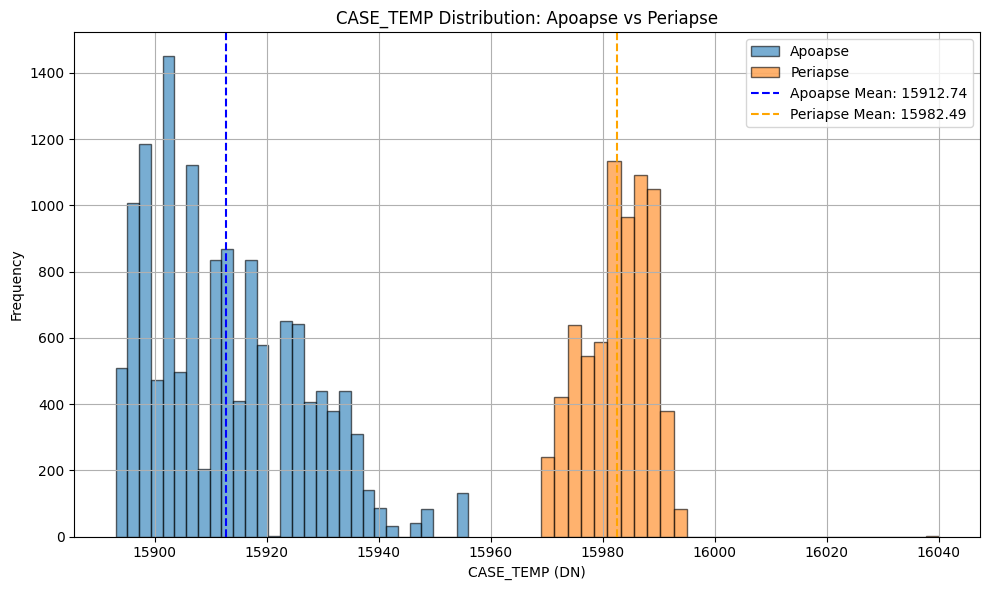

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(apo, bins=30, alpha=0.6, label='Apoapse', edgecolor='black')
plt.hist(peri, bins=30, alpha=0.6, label='Periapse', edgecolor='black')
plt.axvline(apo.mean(), color='blue', linestyle='--', label=f"Apoapse Mean: {apo.mean():.2f}")
plt.axvline(peri.mean(), color='orange', linestyle='--', label=f"Periapse Mean: {peri.mean():.2f}")
plt.title("CASE_TEMP Distribution: Apoapse vs Periapse")
plt.xlabel("CASE_TEMP (DN)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As we observe from out test and visualizayion above, there is a significant statistical difference between the mean CASE_TEMP of apoapse and periapse. Hence we reject our Null Hypothesis

## Hypothesis: Set 2

Null Hypothesis: There is no linear correlation between 'CASE_TEMP' and 'DET_TEMP' OR P = 0

Alternate Hypothesis: There is linear correlation between 'CASE_TEMP' and 'DET_TEMP' OR P $\neq$ 0

In [40]:
apo_temp = df_apoapse[["CASE_TEMP", "DET_TEMP"]]
peri_temp = df_periapse[["CASE_TEMP", "DET_TEMP"]]

In [41]:
from scipy.stats import pearsonr, spearmanr

# Apoapse correlation
r_apo, pval_apo = pearsonr(apo_temp["CASE_TEMP"], apo_temp["DET_TEMP"])
rho_apo, _ = spearmanr(apo_temp["CASE_TEMP"], apo_temp["DET_TEMP"])

# Periapse correlation
r_peri, pval_peri = pearsonr(peri_temp["CASE_TEMP"], peri_temp["DET_TEMP"])
rho_peri, _ = spearmanr(peri_temp["CASE_TEMP"], peri_temp["DET_TEMP"])

print(f"Apoapse Pearson: r = {r_apo:.4f}, p = {pval_apo:.4g}")
print(f"Apoapse Spearman: ρ = {rho_apo:.4f}")
print(f"Periapse Pearson: r = {r_peri:.4f}, p = {pval_peri:.4g}")
print(f"Periapse Spearman: ρ = {rho_peri:.4f}")

Apoapse Pearson: r = 0.7536, p = 0
Apoapse Spearman: ρ = 0.7727
Periapse Pearson: r = 0.0931, p = 3.08e-15
Periapse Spearman: ρ = 0.2873


Text(0.5, 1.03, 'Periapse: CASE_TEMP vs DET_TEMP')

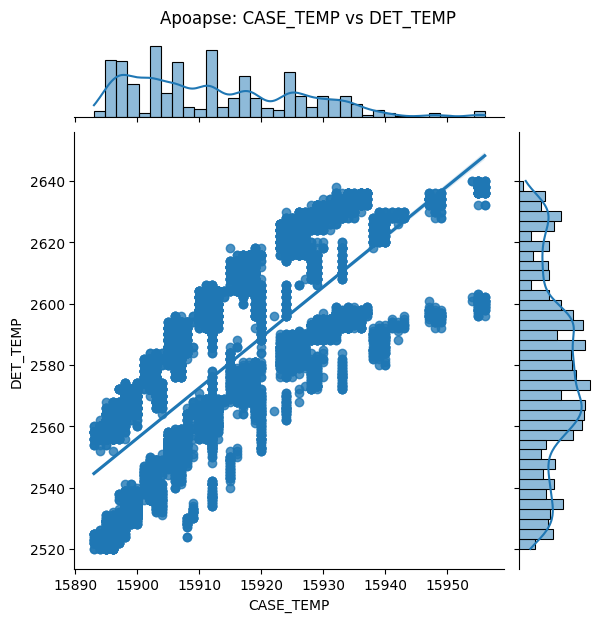

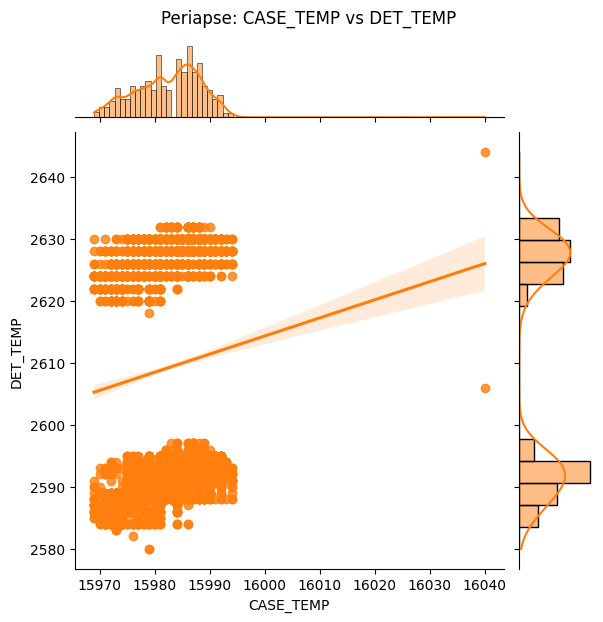

In [42]:
import seaborn as sns

# Apoapse
sns.jointplot(data=apo_temp, x="CASE_TEMP", y="DET_TEMP", kind="reg", color="tab:blue").fig.suptitle("Apoapse: CASE_TEMP vs DET_TEMP", y=1.03)

# Periapse
sns.jointplot(data=peri_temp, x="CASE_TEMP", y="DET_TEMP", kind="reg", color="tab:orange").fig.suptitle("Periapse: CASE_TEMP vs DET_TEMP", y=1.03)


As we observe from the p value for apoapse and periapse, both the values are significantly lower than 0.05, we reject the null hypothesis for both the cases. 
Or 
For apoapse and periapse, both have a linear relationship between 'CASE_TEMP' and 'DET_TEMP'

Observations from visuals: We can observe that in the graph of Apoapse, the regression line is tight and reliable with clear upward trends. Whereas in the graph of Periapse, the regression line is noisy and wide with flat clusters indicating weak trends.

Result: It could be interpreted that the Apoapse have stronger thermal coupling whereas Periapse has weak thermal coupling.

In [43]:
from scipy.stats import zscore

df_apoapse["NORMALIZED_CASE_TEMP"] = zscore(df_apoapse["CASE_TEMP"])
df_periapse["NORMALIZED_CASE_TEMP"] = zscore(df_periapse["CASE_TEMP"])

In [44]:
print(df_apoapse["NORMALIZED_CASE_TEMP"])
print(df_periapse["NORMALIZED_CASE_TEMP"])

0        0.979938
1        0.240727
2        0.240727
3        0.240727
4        0.240727
           ...   
13755    0.462490
13756   -0.128878
13757   -0.128878
13758   -0.128878
13759    1.497385
Name: NORMALIZED_CASE_TEMP, Length: 13760, dtype: float64
0      -1.626651
1      -1.283900
2      -1.283900
3      -1.283900
4      -1.283900
          ...   
7137   -0.255647
7138   -0.255647
7139   -0.255647
7140   -0.255647
7141    9.855505
Name: NORMALIZED_CASE_TEMP, Length: 7142, dtype: float64


## Hypothesis: Set 3

Null Hypothsis: The polynomial model does not improve fit over a null model

Alternate Hypothesis: The polynomial model does improve fit over a null model

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [46]:
def polymodel(X,y):
    # Linear model (degree = 1)
    poly1 = PolynomialFeatures(degree=1)
    X1 = poly1.fit_transform(X)
    model1 = LinearRegression().fit(X1, y)
    y_pred1 = model1.predict(X1)

    # Polynomial model (degree = 2)
    poly2 = PolynomialFeatures(degree=2)
    X2 = poly2.fit_transform(X)
    model2 = LinearRegression().fit(X2, y)
    y_pred2 = model2.predict(X2)

    # R-squared and MSE comparison
    r2_linear = r2_score(y, y_pred1)
    r2_poly = r2_score(y, y_pred2)
    mse_linear = mean_squared_error(y, y_pred1)
    mse_poly = mean_squared_error(y, y_pred2)

    print(f"Linear R² = {r2_linear:.4f}, MSE = {mse_linear:.4f}")
    print(f"Polynomial R² = {r2_poly:.4f}, MSE = {mse_poly:.4f}")
    graph(X, y, y_pred1, y_pred2)


In [47]:
def graph(X, y, y_pred1, y_pred2):
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, alpha=0.3, label="Observed", s=10)
    plt.plot(X, y_pred1, color="blue", label="Linear Fit")
    plt.plot(X, y_pred2, color="red", label="Quadratic Fit")
    plt.xlabel("ET (Ephemeris Time)")
    plt.ylabel("Normalized CASE_TEMP")
    plt.title("Linear vs Polynomial Fit")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [48]:
# Apoapse
X = df_apoapse["ET"].values.reshape(-1, 1)
y = df_apoapse["NORMALIZED_CASE_TEMP"].values

# Periapse
X2 = df_periapse["ET"].values.reshape(-1, 1)
y2 = df_periapse["NORMALIZED_CASE_TEMP"].values



Linear R² = 0.0036, MSE = 0.9964
Polynomial R² = 0.0098, MSE = 0.9902


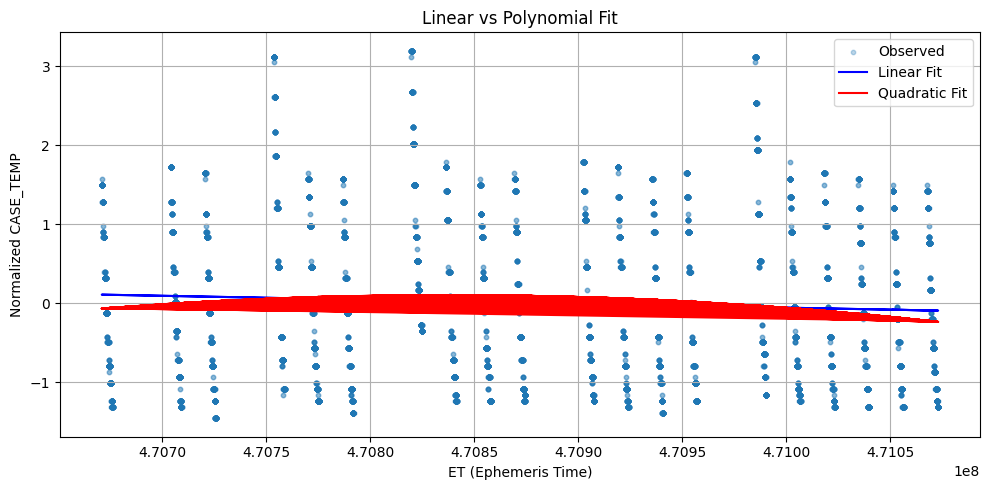

In [49]:
# Apoapse
polymodel(X,y)

Linear R² = 0.0659, MSE = 0.9341
Polynomial R² = 0.0727, MSE = 0.9273


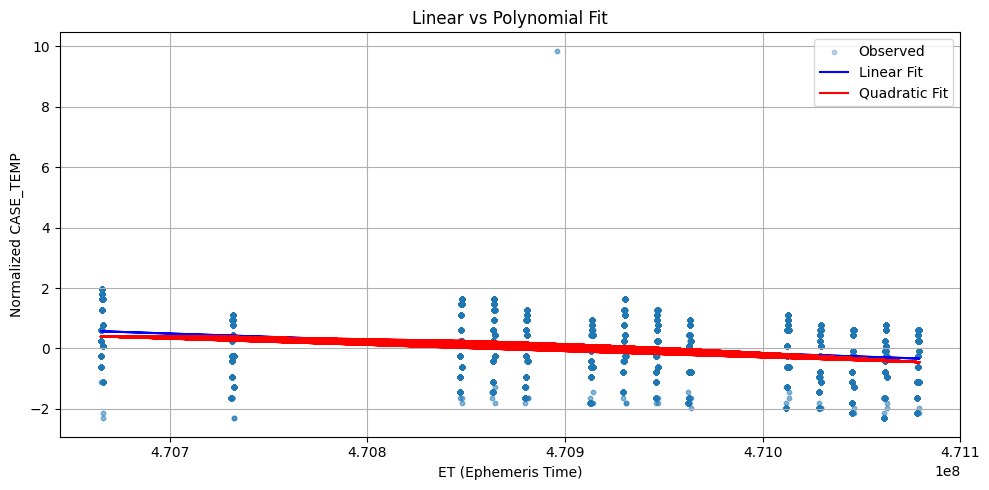

In [50]:
polymodel(X2,y2)

Observation: As we observe that the $R^2$ value for the quadratic model of apoapse is 0.0098 which is less than 1% of variance, and the $R^2$ value for the quadratic model of periapse is 0.0727 which is a slight improvement but still less than 1% of vaiance, we can infer that the improvement of both the models for apoapse and periapse is minimal. 

Hence we fail to reject the null hypothesis OR the null hypothesis gets selected